#Demo for HAR load_dataset functions
load_dataset_demo.ipynb

This is a brief demo and simple test of the load_dataset functions that convert the raw time based accelerometer data and human activity recognition (HAR) labels to trainX, trainy, testX, testy numpy arrays. 
* Builds numpy arrays using load_dataset functions and default arguments
* Builds/Trains/Evaluates a 1D CNN classifier for the selected dataset
* Displays several model evaluation figures and metrics

Author:  Lee B. Hinkle, IMICS Lab, Texas State University, 2021

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

TODO:
* Accuracy for UCI HAR seems too low - double check model parameters.



In [1]:
#mount google drive in colab session
#enter path to where the git repo was cloned
my_path = '/content/drive/My Drive/Colab Notebooks/har_load_data'

In [17]:
#@title Select Dataset
dataset = "UCI HAR" #@param ["MobiAct ADL", "UniMiB SHAR","UCI HAR"]


#Imports

In [18]:
import os
import shutil
from scipy import io #for loadmat, matlab conversion
import numpy as np
import matplotlib.pyplot as plt # for plotting training curves

#Get numpy arrays from load_dataset

In [19]:
#Copy selected .py file into colab and import load_dataset function
if (dataset == 'MobiAct ADL'):
    full_filename = my_path+'/'+'mobiact_adl_load_dataset.py'
    shutil.copy(full_filename,'mobiact_adl_load_dataset.py')
    from mobiact_adl_load_dataset import mobiact_adl_load_dataset
    x_train, y_train, x_test, y_test = mobiact_adl_load_dataset(incl_val_group = False)
    EPOCHS = 60
elif (dataset == 'UniMiB SHAR'):
    datasetfn = 'mobiact_adl_load_dataset.py'
    full_filename = my_path+'/'+'unimib_shar_adl_load_dataset.py'
    shutil.copy(full_filename,'unimib_shar_adl_load_dataset.py')
    from unimib_shar_adl_load_dataset import unimib_load_dataset
    x_train, y_train, x_test, y_test = unimib_load_dataset(incl_val_group = False)
    EPOCHS = 100
elif (dataset == 'UCI HAR'):
    full_filename = my_path+'/'+'uci_har_load_dataset.py'
    shutil.copy(full_filename,'uci_har_load_dataset.py')
    from uci_har_load_dataset import uci_har_load_dataset
    x_train, y_train, x_test, y_test = uci_har_load_dataset(incl_val_group = False)
    EPOCHS = 100
else:
    print('ERROR: dataset unknown')

Unzipping UCI_HAR_Dataset.zip file
Reshaped data    shape           object type              data type
---------------  --------------  -----------------------  -----------
x_train:         (7352, 128, 1)  <class 'numpy.ndarray'>  float64
y_train:         (7352, 6)       <class 'numpy.ndarray'>  float32
x_test:          (2947, 128, 1)  <class 'numpy.ndarray'>  float64
y_test:          (2947, 6)       <class 'numpy.ndarray'>  float32


In [20]:
from tensorflow import keras #added to save model
from tensorflow.keras import layers #format matches MNIST example

#Build a 1D CNN model
topology and good article
[here](https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf)

In [21]:
#topology and good article here
#https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
if (True):
	n_timesteps, n_features, n_outputs = x_train.shape[1], x_train.shape[2], y_train.shape[1]
	model = keras.Sequential(
		[
			keras.Input(shape=(n_timesteps,n_features)),
			layers.Conv1D(filters=100, kernel_size=50, activation='relu'),
			layers.Conv1D(filters=100, kernel_size=50, activation='relu'),
			layers.Dropout(0.5),
			layers.MaxPooling1D(pool_size=2),
			layers.Flatten(),
			layers.Dense(100, activation='relu'),
			layers.Dense(n_outputs, activation='softmax')
   		]
	)
	model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 79, 100)           5100      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 30, 100)           500100    
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 100)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 15, 100)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               150100    
_________________________________________________________________
dense_5 (Dense)              (None, 6)                

#Train the model

In [22]:
BATCH_SIZE = 32     # Typical values are 8, 16 or 32
NUM_EPOCHS = EPOCHS

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
        x_train,y_train,
        steps_per_epoch=x_train.shape[1]//BATCH_SIZE,
        epochs=NUM_EPOCHS,
        validation_data=(x_test,y_test),
        validation_steps=x_test.shape[1]//BATCH_SIZE)

Epoch 1/100
4/4 [==============================] - 1s 122ms/step - loss: 1.7092 - accuracy: 0.1608 - val_loss: 1.5193 - val_accuracy: 0.3417
Epoch 2/100
4/4 [==============================] - 0s 58ms/step - loss: 1.5404 - accuracy: 0.2766 - val_loss: 1.5301 - val_accuracy: 0.3308
Epoch 3/100
4/4 [==============================] - 0s 61ms/step - loss: 1.4889 - accuracy: 0.3345 - val_loss: 1.4368 - val_accuracy: 0.4313
Epoch 4/100
4/4 [==============================] - 0s 58ms/step - loss: 1.3896 - accuracy: 0.3837 - val_loss: 1.3615 - val_accuracy: 0.4252
Epoch 5/100
4/4 [==============================] - 0s 61ms/step - loss: 1.2226 - accuracy: 0.4064 - val_loss: 1.1688 - val_accuracy: 0.3821
Epoch 6/100
4/4 [==============================] - 0s 60ms/step - loss: 1.1157 - accuracy: 0.4053 - val_loss: 1.0496 - val_accuracy: 0.4669
Epoch 7/100
4/4 [==============================] - 0s 59ms/step - loss: 1.0235 - accuracy: 0.4482 - val_loss: 1.0650 - val_accuracy: 0.4069
Epoch 8/100
4/4 [==

#Show Final Validation Accuracy and Loss Curve 

UCI HAR Final Validation Accuracy: 0.625


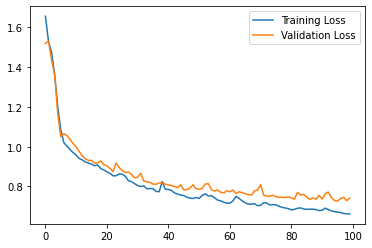

In [23]:
print(dataset, "Final Validation Accuracy: %0.3f" % history.history['val_accuracy'][-1])
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()